# "ProsperNet: Predicting High-Income Individuals"
#### *- Janani Karthikeyan*


This project aims to develop a predictive model using supervised learning algorithms. The model will utilize data collected from the 1994 U.S. Census to accurately predict whether an individual's income exceeds $50,000. This project is particularly relevant for non-profit organizations seeking to optimize donation requests and outreach strategies. By understanding an individual's income level, non-profits can tailor their approaches accordingly, maximizing their fundraising efforts.

The dataset used in this project is sourced from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Census+Income), contributed by Ron Kohavi and Barry Becker.


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data Selection & Preprocessing

Data Importing & Cleaning.

In [62]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
from sklearn.metrics import f1_score, accuracy_score

%matplotlib inline
data = pd.read_csv("/content/drive/MyDrive/DM_SEM_2/DM_PROJECT/census+income/adult.data.csv")
display(data.head(n=10))

,age,workclass,fnlwgt,education,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [63]:
# Missing values
data.dropna(inplace=True)

Income Data Description.

In [64]:
n_records = len(data)

n_greater_50k = len(data[data.income==" >50K"])

n_at_most_50k = len(data[data.income==" <=50K"])

greater_percent = n_greater_50k/n_records*100.0

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32561
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24720
Percentage of individuals making more than $50,000: 24.08%


Transforming Skewed Continuous Features.

In [65]:
def distribution(data, transformed = False):
    fig = pl.figure(figsize = (11,5));

    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

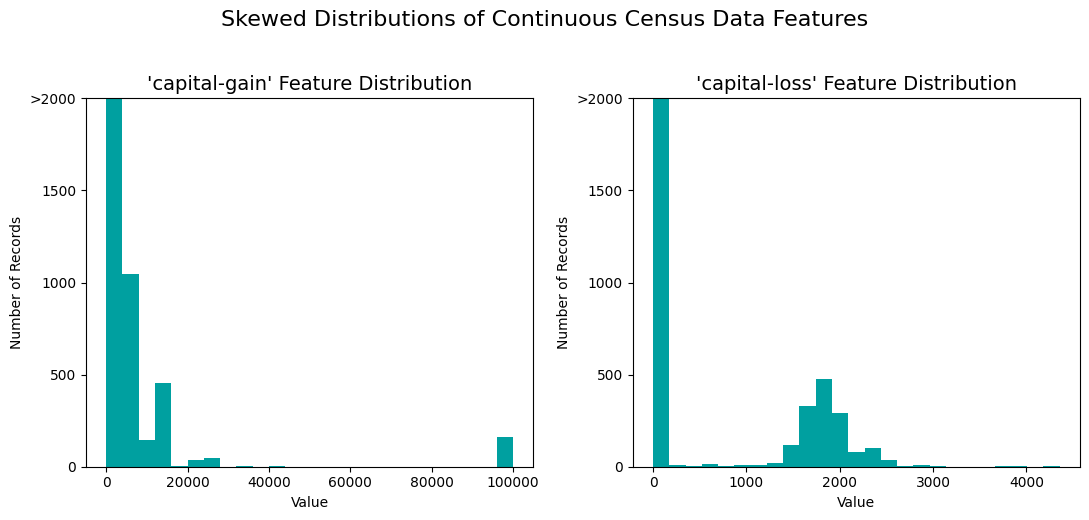

In [66]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
distribution(data)

Log-transform the skewed features.

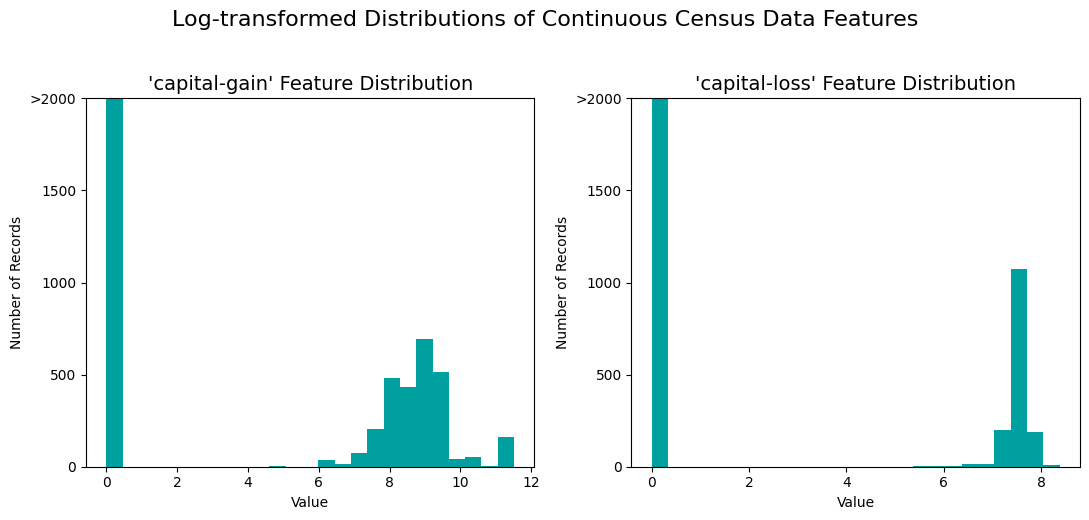

In [67]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

distribution(features_log_transformed, transformed = True)

Data Normalization.

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-level', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,age,workclass,fnlwgt,education,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,77516,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


Encoding the 'income_raw' data to numerical values.

In [70]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

print(income_raw.unique())

income_mapping = {' <=50K': 0, ' >50K': 1}
income = income_raw.replace(income_mapping)

encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

[' <=50K' ' >50K']
108 total features after one-hot encoding.
['age', 'fnlwgt', 'education-level', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-cl

In [71]:
data

,age,workclass,fnlwgt,education,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Splitting data into training and testing sets.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    income,
                                                    test_size = 0.2,
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 26048 samples.
Testing set has 6513 samples.


## 2. Exploratory Data Analysis and Feature Selection

EDA to understand the dataset's characteristics.

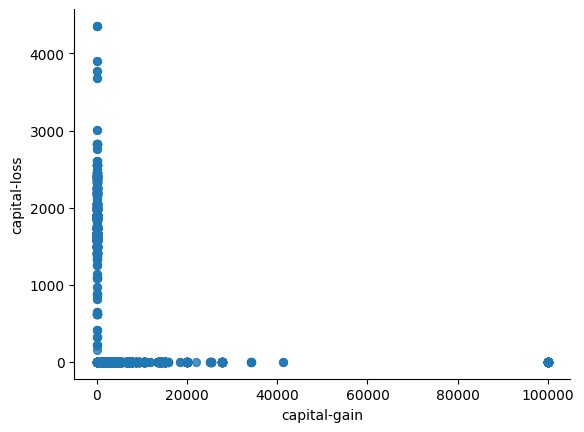

In [94]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='capital-gain', y='capital-loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

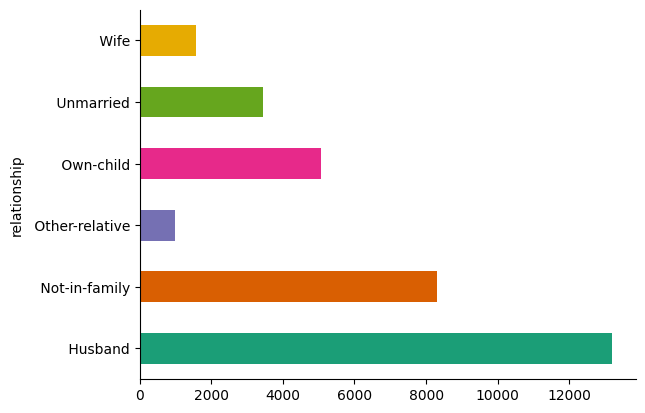

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-95-9f9f61dfb741>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='age', y='marital-status', inner='box', palette='Dark2')


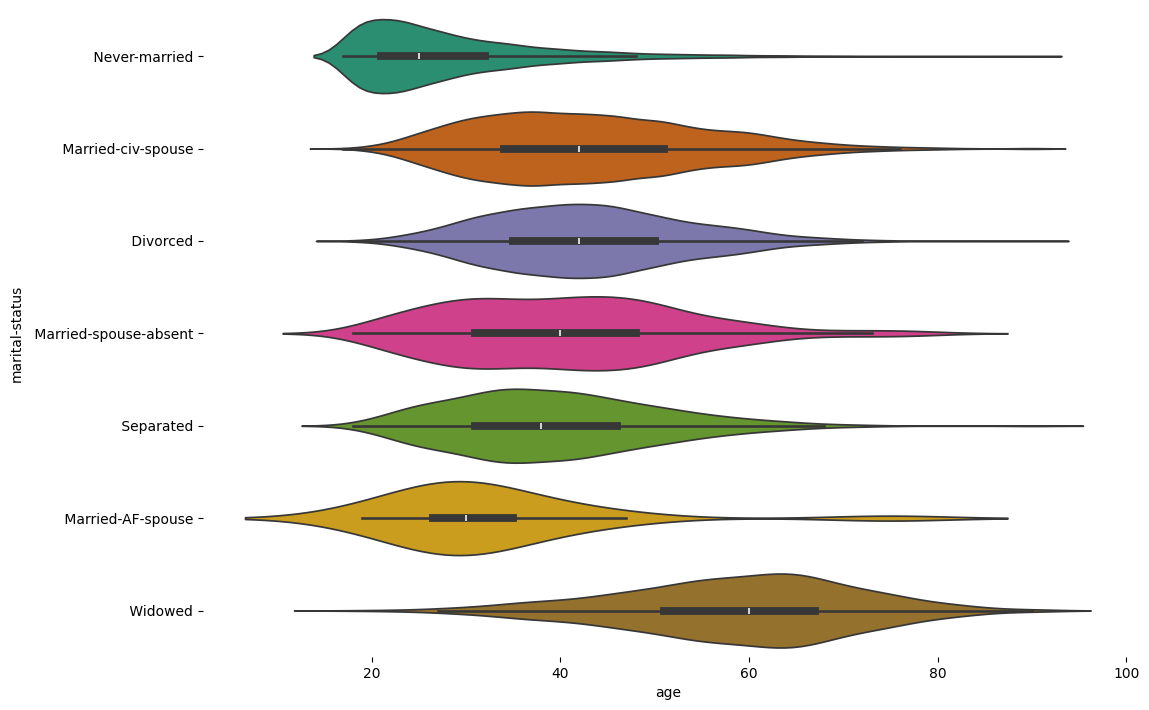

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['marital-status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='marital-status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

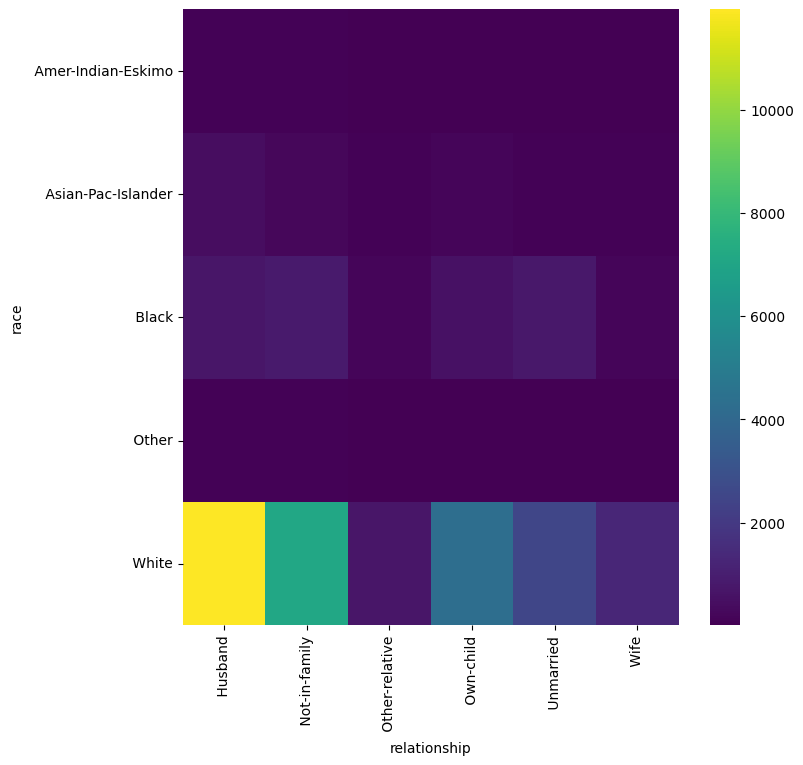

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race'].value_counts()
    for x_label, grp in data.groupby('relationship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relationship')
_ = plt.ylabel('race')

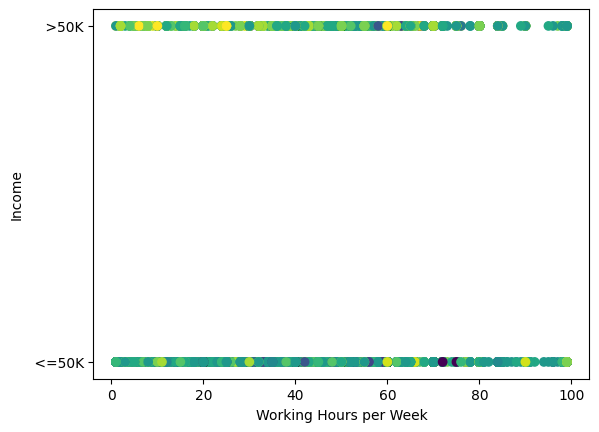

In [97]:
import matplotlib.pyplot as plt
plt.scatter(data['hours-per-week'], data['income'], c=data['education-level'])
plt.xlabel('Working Hours per Week')
_ = plt.ylabel('Income')

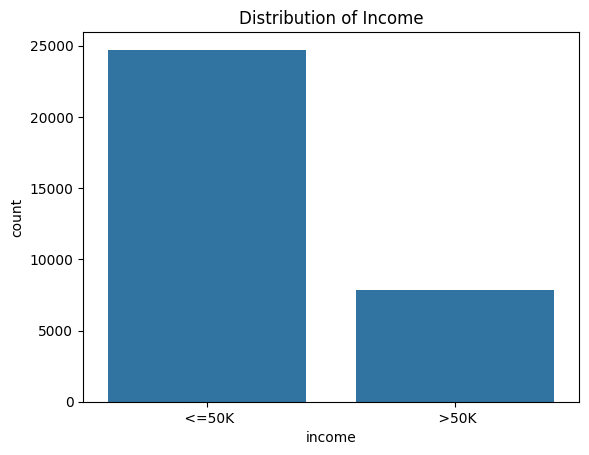

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.show()

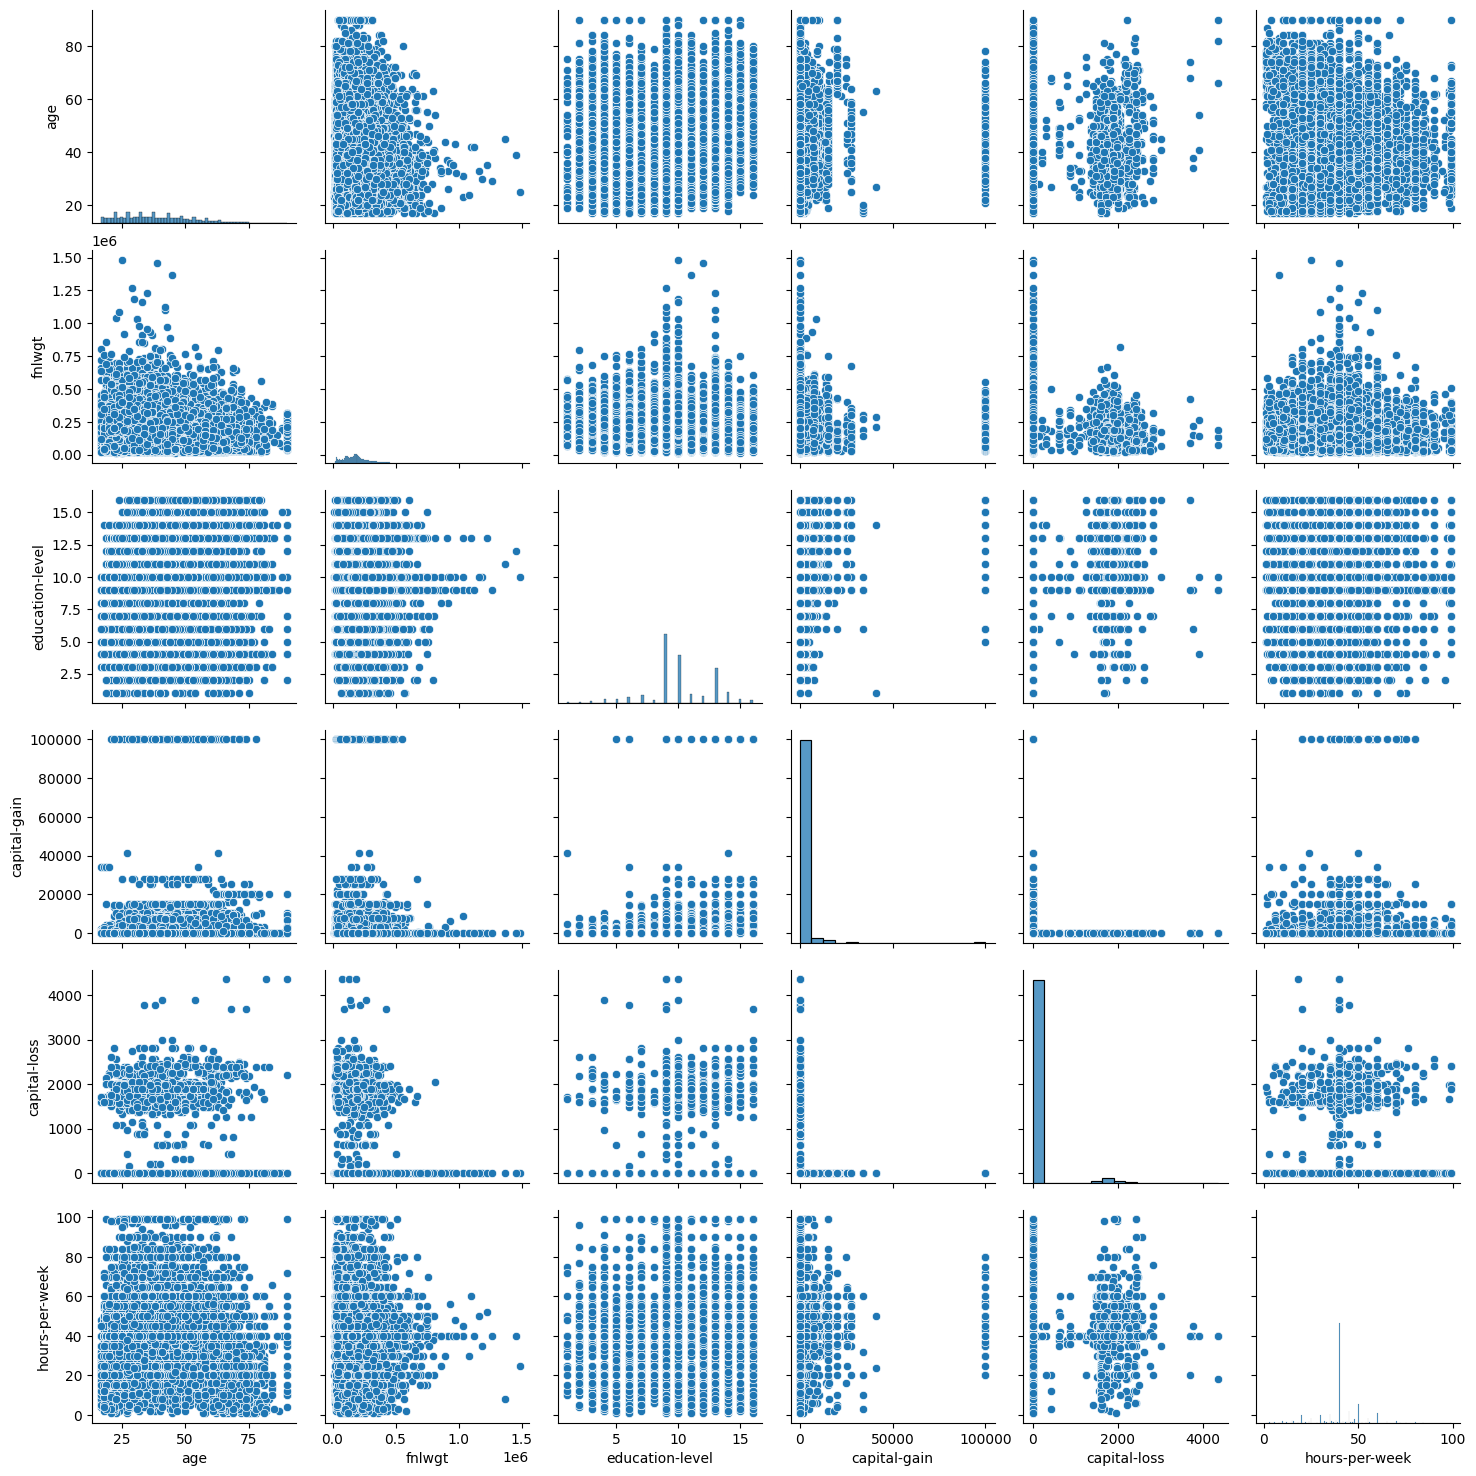

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

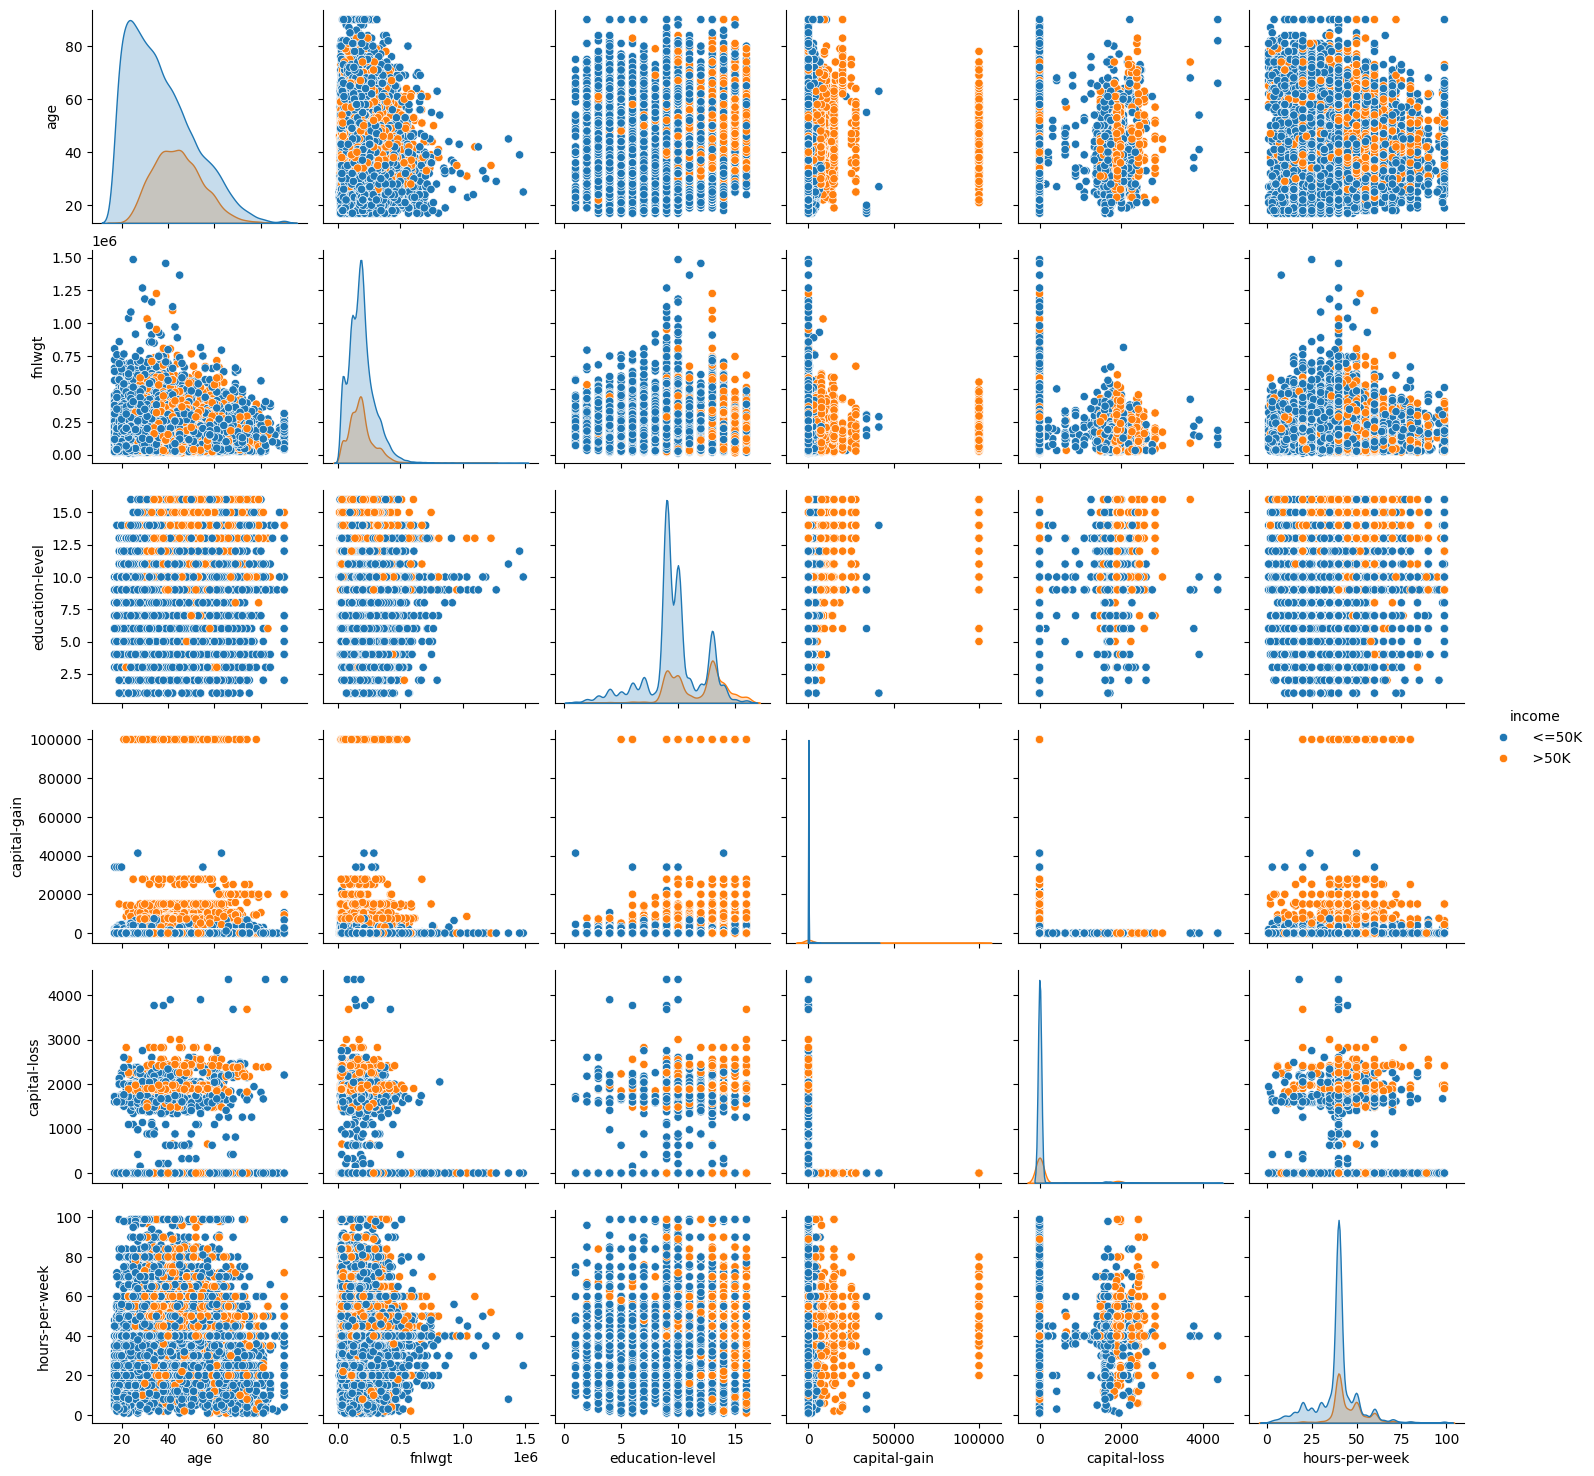

In [75]:
sns.pairplot(data, hue='income')
plt.show()

Feature selection technique - Chi squared to identify relevant features for modeling.

In [76]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

print(featureScores.nlargest(10, 'Score'))


                               Feature          Score
1                               fnlwgt  307258.202987
33  marital-status_ Married-civ-spouse    2819.490968
53               relationship_ Husband    2551.752985
35       marital-status_ Never-married    1798.602088
3                         capital-gain    1564.847650
56             relationship_ Own-child    1150.323106
42         occupation_ Exec-managerial    1077.129436
64                         sex_ Female     845.633796
27                  education_ Masters     778.443924
48          occupation_ Prof-specialty     769.778962


## 3. Model Implementation and Baseline Evaluating Model Performance.

Naive Predictor Performance.

In [77]:
import numpy as np
import pandas as pd
import math
TP = np.sum(income)
FP = (income == 0).sum()
TN = 0
FN = 0

if int(TP) + int(FP) == 0:
    accuracy = 1
else:
    accuracy = float(TP) / (TP + FP)

if int(TP) + int(FP) == 0:
    precision = 0
else:
    precision = TP / (TP + FP)

recall = float(TP) / (TP + FN)


beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall + math.pow(10, -12))

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, Recall: {:.4f}, Precision: {:.4f}]".format(accuracy, fscore, recall, precision))

Naive Predictor: [Accuracy score: 0.2408, F-score: 0.2839, Recall: 1.0000, Precision: 0.2408]


Implementation of Logistic Regression, AdaBoost, Decision Trees, and MLP Classifier for model fitting.

In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

top_indices = bestfeatures.get_support(indices=True)

X_train_selected = X_train.iloc[:, top_indices]
X_test_selected = X_test.iloc[:, top_indices]

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train_selected, y_train)

y_pred = logistic_model.predict(X_test_selected)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ACCURACY OF THE LOGISTIC REGRESSION MODEL: ", accuracy*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4918
           1       0.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513

Confusion Matrix:
[[4918    0]
 [1595    0]]
Accuracy: 0.7551051742668509
ACCURACY OF THE LOGISTIC REGRESSION MODEL:  75.51051742668508


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train_selected, y_train)

y_pred = adaboost_model.predict(X_test_selected)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY OF THE ADABOOST MODEL: ", accuracy*100)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4918
           1       0.75      0.53      0.62      1595

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.76      6513
weighted avg       0.83      0.84      0.83      6513

Confusion Matrix:
[[4633  285]
 [ 757  838]]
ACCURACY OF THE ADABOOST MODEL:  84.00122831260556


In [80]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

selected_features = featureScores.nlargest(10, 'Score')['Feature'].values

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train_selected, y_train)

y_pred = decision_tree_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY OF THE DECISION TREES MODEL: ", accuracy*100)

Model Accuracy: 0.7870413020113619
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4918
           1       0.57      0.55      0.56      1595

    accuracy                           0.79      6513
   macro avg       0.71      0.71      0.71      6513
weighted avg       0.79      0.79      0.79      6513

Confusion Matrix:
[[4242  676]
 [ 711  884]]
ACCURACY OF THE DECISION TREES MODEL:  78.7041302011362


In [81]:
#MLP classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

selected_features = featureScores.nlargest(10, 'Score')['Feature'].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500)

mlp_classifier.fit(X_train_selected, y_train)

y_pred = mlp_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ACCURACY OF THE DECISION TREES MODEL: ", accuracy*100)

Accuracy: 0.7552587133425457
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4918
           1       1.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.88      0.50      0.43      6513
weighted avg       0.82      0.76      0.65      6513

ACCURACY OF THE DECISION TREES MODEL:  75.52587133425457


Baseline Model Evaluation using initial features without hyperparameter tuning.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = featureScores.nlargest(10, 'Score')['Feature'].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

logistic_regression = LogisticRegression()
adaboost = AdaBoostClassifier()
decision_tree = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()

models = {
    'Logistic Regression': logistic_regression,
    'AdaBoost': adaboost,
    'Decision Tree': decision_tree,
    'MLP Classifier': mlp_classifier
}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print()

models1 = {
    'AdaBoost': adaboost,
    'Decision Tree': decision_tree,
    'MLP Classifier': mlp_classifier
}

Training and evaluating Logistic Regression...
Accuracy: 0.7551
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4918
           1       0.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513


Training and evaluating AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8400
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4918
           1       0.75      0.53      0.62      1595

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.76      6513
weighted avg       0.83      0.84      0.83      6513


Training and evaluating Decision Tree...
Accuracy: 0.7872
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4918
           1       0.57      0.55      0.56      1595

    accuracy                           0.79      6513
   macro avg       0.71      0.71      0.71      6513
weighted avg       0.79      0.79      0.79      6513


Training and evaluating MLP Classifier...
Accuracy: 0.7551
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4918
           1       0.00      0.00      0.00      1595

    accuracy                           0.76   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. Hyperparameter Tuning

Hyperparameter Tuning for Logistic Regression, AdaBoost, Decision Trees and MLP Classifier.

In [84]:
#hyperparameter tuning for adaboost, decision trees, mlp classifier
from sklearn.model_selection import GridSearchCV

logistic_regression_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
decision_tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
mlp_classifier_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)], 'alpha': [0.0001, 0.001, 0.01]}

grid_searches = {}

for name, model in models1.items():
    print(f"Performing grid search for {name}...")
    if name == 'Logistic Regression':
        grid_search = GridSearchCV(model, logistic_regression_params, cv=5, scoring='accuracy', verbose=1)
    if name == 'AdaBoost':
        grid_search = GridSearchCV(model, adaboost_params, cv=5, scoring='accuracy', verbose=1)
    elif name == 'Decision Tree':
        grid_search = GridSearchCV(model, decision_tree_params, cv=5, scoring='accuracy', verbose=1)
    elif name == 'MLP Classifier':
        grid_search = GridSearchCV(model, mlp_classifier_params, cv=5, scoring='accuracy', verbose=1)

    grid_search.fit(X_train_selected, y_train)
    grid_searches[name] = grid_search
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print()

Performing grid search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score: 0.8454

Performing grid search for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'max_depth': 10, 'min_samples_split': 5}
Best cross-validation score: 0.8425

Performing grid search for MLP Classifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Best cross-validation score: 0.7625



In [88]:
#hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Norm used in penalization
    'class_weight': [None, 'balanced'],     # Weights associated with classes
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization
}

scoring_metric = 'accuracy'

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring=scoring_metric, cv=5, verbose=1)

grid_search.fit(X_train_selected, y_train)

best_parameters = grid_search.best_params_
print(f"Best parameters: {best_parameters}")


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did n

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solve

Re-evaluation of Logistic Regression, AdaBoost, Decision Trees and MLP Classifier with tuned hyperparameters.

In [90]:
#re-evaluation of logistic regression, adaboost, decision trees, mlp classifier after tuning
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

tuned_models = {
    'Logistic Regression': LogisticRegression(**best_parameters),
    'AdaBoost': AdaBoostClassifier(**grid_searches['AdaBoost'].best_params_),
    'Decision Tree': DecisionTreeClassifier(**grid_searches['Decision Tree'].best_params_),
    'MLP Classifier': MLPClassifier(**grid_searches['MLP Classifier'].best_params_)
}

evaluations = {}

for name, model in tuned_models.items():
    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_valid_selected)

    accuracy = accuracy_score(y_valid, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')

    evaluations[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score}

for name, metrics in evaluations.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.8301343570057581
Precision: 0.685031185031185
Recall: 0.5310233682514102
F1-score: 0.5982750794371312

Model: AdaBoost
Accuracy: 0.8504798464491363
Precision: 0.7566666666666667
Recall: 0.5487510072522159
F1-score: 0.6361513311536665

Model: Decision Tree
Accuracy: 0.8558541266794626
Precision: 0.7790432801822323
Recall: 0.5511684125705076
F1-score: 0.6455875412930628

Model: MLP Classifier
Accuracy: 0.2381957773512476
Precision: 0.2381957773512476
Recall: 1.0
F1-score: 0.38474655092233767



## 5. Model Evaluation and Comparitative Analysis

Evaluating models using metrics such as accuracy, precision, recall, F1 score, and
ROC-AUC.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
evaluation_metrics = {}

for name, model in tuned_models.items():
    y_pred = model.predict(X_valid_selected)
    y_proba = model.predict_proba(X_valid_selected)[:, 1]

    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_proba)

    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
                                'F1 Score': f1, 'ROC-AUC': roc_auc}

for name, metrics in evaluation_metrics.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.8301
Precision: 0.6850
Recall: 0.5310
F1 Score: 0.5983
ROC-AUC: 0.8641

Model: AdaBoost
Accuracy: 0.8505
Precision: 0.7567
Recall: 0.5488
F1 Score: 0.6362
ROC-AUC: 0.8902

Model: Decision Tree
Accuracy: 0.8559
Precision: 0.7790
Recall: 0.5512
F1 Score: 0.6456
ROC-AUC: 0.8939

Model: MLP Classifier
Accuracy: 0.2382
Precision: 0.2382
Recall: 1.0000
F1 Score: 0.3847
ROC-AUC: 0.5153



Comparing the performance, computational efficiency, and applicability of each algorithm.

In [92]:
import time

model_comparison = {}

for name, model in tuned_models.items():
    start_time = time.time()

    model.fit(X_train_selected, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_valid_selected)
    y_proba = model.predict_proba(X_valid_selected)[:, 1]

    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_proba)

    model_comparison[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
                              'F1 Score': f1, 'ROC-AUC': roc_auc, 'Training Time': training_time}

for name, metrics in model_comparison.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


Model: Logistic Regression
Accuracy: 0.8292
Precision: 0.6849
Recall: 0.5238
F1 Score: 0.5936
ROC-AUC: 0.8618
Training Time: 0.1397

Model: AdaBoost
Accuracy: 0.8505
Precision: 0.7567
Recall: 0.5488
F1 Score: 0.6362
ROC-AUC: 0.8902
Training Time: 5.2621

Model: Decision Tree
Accuracy: 0.8559
Precision: 0.7790
Recall: 0.5512
F1 Score: 0.6456
ROC-AUC: 0.8939
Training Time: 0.0799

Model: MLP Classifier
Accuracy: 0.2382
Precision: 0.2382
Recall: 1.0000
F1 Score: 0.3847
ROC-AUC: 0.5018
Training Time: 3.8976



Based on the outputs, insights on the performance, computational efficiency, and applicability of each algorithm:

1. **Logistic Regression**:
   - **Performance**: Moderate accuracy (82.92%) and relatively lower precision, recall, and F1 score compared to other models. However, it achieves a good ROC-AUC score (86.18%), indicating decent predictive power.
   - **Computational Efficiency**: Very low training time (0.1397 seconds), making it highly efficient.
   - **Applicability**: Logistic regression is suitable for binary classification tasks and performs well when the relationship between features and target variable is linear or can be approximated linearly.

2. **AdaBoost**:
   - **Performance**: Good accuracy (85.05%) and better precision, recall, and F1 score compared to logistic regression. It also achieves a high ROC-AUC score (89.02%).
   - **Computational Efficiency**: Higher training time (5.2621 seconds) compared to logistic regression but still reasonable.
   - **Applicability**: AdaBoost is suitable for classification tasks and is often used as an ensemble method to improve the performance of weak learners.

3. **Decision Tree**:
   - **Performance**: Similar accuracy to AdaBoost (85.59%) with comparable precision, recall, and F1 score. It achieves a high ROC-AUC score (89.39%).
   - **Computational Efficiency**: Very low training time (0.0799 seconds), making it highly efficient.
   - **Applicability**: Decision trees are versatile and can handle both classification and regression tasks. They are interpretable and can capture non-linear relationships in the data.

4. **MLP Classifier**:
   - **Performance**: Significantly lower accuracy (23.82%) compared to other models. It has low precision, high recall, and low F1 score, indicating imbalanced performance. The ROC-AUC score (50.18%) suggests poor predictive power.
   - **Computational Efficiency**: Relatively higher training time (3.8976 seconds) compared to other models.
   - **Applicability**: Multilayer Perceptron (MLP) classifiers are neural network models suitable for complex non-linear relationships in data. However, in this case, the model's performance is poor, indicating potential overfitting or other issues.



## 6. Conclusion and Recommendations

Summary of findings and insights.

Based on the comparitative analysis, we can say, while logistic regression and decision tree models are computationally efficient and provide reasonable performance, AdaBoost stands out as the best-performing model in terms of accuracy and overall predictive power.

Recommendations on the most suitable algorithms for the dataset and problem
type.


Based on the problem statement and the dataset, the most suitable algorithms are:

1. **Decision Trees**:
   - **Advantages**: Decision trees are versatile, interpretable, and can handle both numerical and categorical data. They are capable of capturing complex non-linear relationships in the data, making them suitable for this classification task.
   - **Applicability**: Decision trees can effectively predict high-income individuals based on various demographic and socio-economic features from the census dataset. Their interpretability allows for easy understanding of the factors contributing to high income.

2. **Gradient Boosting Machines (GBM)**:
   - **Advantages**: GBM is another ensemble learning technique that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It typically provides better predictive performance than Random Forest and is robust against overfitting.
   - **Applicability**: GBM can effectively handle the classification of high-income individuals by iteratively improving the model's predictive power. It is suitable for this task given the importance of accurate predictions for optimizing donation requests and outreach strategies.

3. **Logistic Regression**:
   - **Advantages**: Logistic Regression is a simple yet effective algorithm for binary classification tasks. It provides interpretable results and is computationally efficient, making it suitable for datasets with a moderate number of features.
   - **Applicability**: While not as complex as decision trees or ensemble methods, Logistic Regression can still provide valuable insights into the factors influencing high-income individuals. It can serve as a baseline model for comparison and may complement other algorithms in ensemble approaches.

4. **Random Forest**:
   - **Advantages**: Random Forest is an ensemble learning method that utilizes multiple decision trees to improve predictive accuracy and robustness. It can handle high-dimensional data with a large number of features and is less prone to overfitting compared to individual decision trees.
   - **Applicability**: Random Forest can provide more accurate predictions by combining the strengths of multiple decision trees. It is suitable for this classification task given the complexity of the dataset and the need for high predictive performance.

Decision Trees, Random Forest, Gradient Boosting Machines, and Logistic Regression are recommended algorithms for predicting high-income individuals in this project. Ensemble methods like Random Forest and GBM are particularly advantageous for their ability to improve predictive performance, while Logistic Regression offers simplicity and interpretability.